*Busines Case Analysis by T Sarath Chandra, Email: sarathchandra.ts@gmail.com*

**Problem Statement**

Profiling the best companies and job positions to work for - from the Scaler's learners database by clustering them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML/scaler_clustering.csv")
print(f"Size of data: {df.shape}")
df_copy = df

Size of data: (205843, 7)


In [ ]:
print(f"\nTop 3 rows in the data: {df.head(3)}\n")


Top 3 rows in the data:    Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000   

         job_position  ctc_updated_year  
0               Other            2020.0  
1  FullStack Engineer            2019.0  
2    Backend Engineer            2020.0  



In [ ]:
print(f"\nData type of columns in data\n")
print(df.info())


Data type of columns in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB
None


In [ ]:
print(f"\nStatiscal summary of numerical columns in data\n")
print(df.describe().astype(int))


Statiscal summary of numerical columns in data

       Unnamed: 0  orgyear         ctc  ctc_updated_year
count      205843   205757      205843            205843
mean       103273     2014     2271685              2019
std         59741       63    11800914                 1
min             0        0           2              2015
25%         51518     2013      530000              2019
50%        103151     2016      950000              2020
75%        154992     2018     1700000              2021
max        206922    20165  1000150000              2021


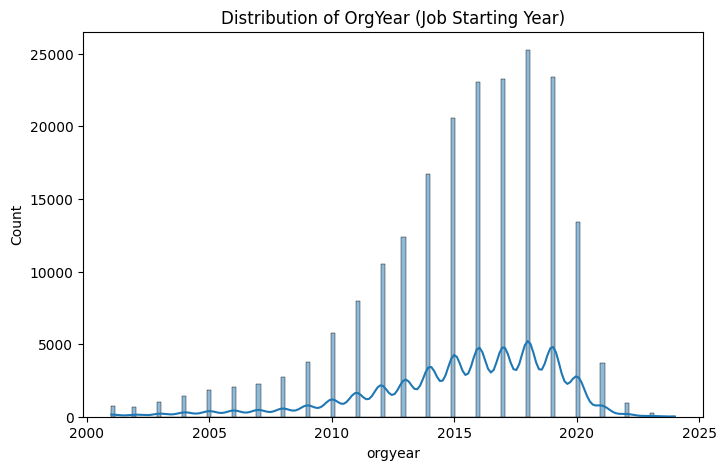

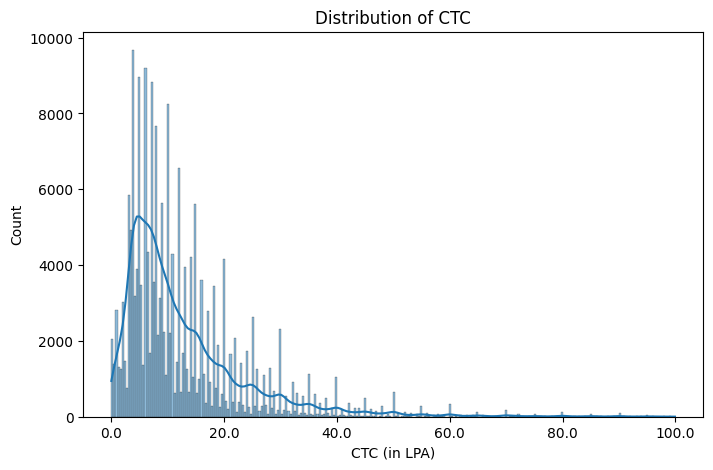

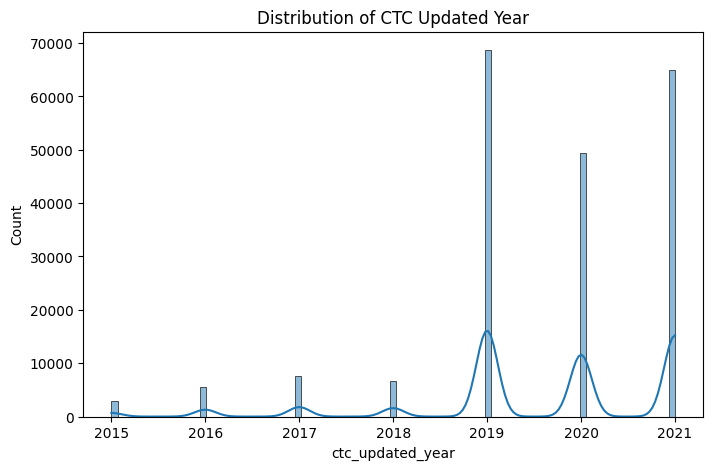

In [ ]:
# Check data distributions in raw data

# Numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format x-axis labels
def format_number(x, pos):
    return f'{int(x)/100000:,}'

filtered_orgyr = df[(df["orgyear"]>2000) & (df["orgyear"]<=2024)]
plt.figure(figsize=(8,5))
sns.histplot(filtered_orgyr["orgyear"], kde=True)
plt.title("Distribution of OrgYear (Job Starting Year)")
plt.show()

filtered_ctc = df[df["ctc"]<10000000]
plt.figure(figsize=(8,5))
sns.histplot(filtered_ctc["ctc"].astype(int), kde=True)
plt.title("Distribution of CTC")
# Format x-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))
# Rename the x-axis
plt.xlabel("CTC (in LPA)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["ctc_updated_year"], kde=True)
plt.title("Distribution of CTC Updated Year")
plt.show()

In [ ]:
# Categorical columns

print(f"Total values in each column: {df.shape[0]}")

# Check for unique values
df["company_hash"].nunique()
df["email_hash"].nunique()
df["job_position"].nunique()
print(f"Unique values in company_hash: {df['company_hash'].nunique()}")
print(f"Unique values in email_hash: {df['email_hash'].nunique()}")
print(f"Unique values in job_position: {df['job_position'].nunique()}")

Total values in each column: 205843
Unique values in company_hash: 37299
Unique values in email_hash: 153443
Unique values in job_position: 1016


In [ ]:
df["company_hash"].value_counts().head(10)

,count
company_hash,
nvnv wgzohrnvzwj otqcxwto,8337
xzegojo,5381
vbvkgz,3481
zgn vuurxwvmrt vwwghzn,3411
wgszxkvzn,3240
vwwtznhqt,2870
fxuqg rxbxnta,2653
gqvwrt,2504
bxwqgogen,2130


In [ ]:
df["email_hash"].value_counts().head(10)

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0,8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c,8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,8


In [ ]:
df["job_position"].value_counts().head(50)

,count
job_position,
Backend Engineer,43554
FullStack Engineer,24717
Other,18071
Frontend Engineer,10417
Engineering Leadership,6870
QA Engineer,6587
Data Scientist,5368
Android Engineer,5357
SDET,4967


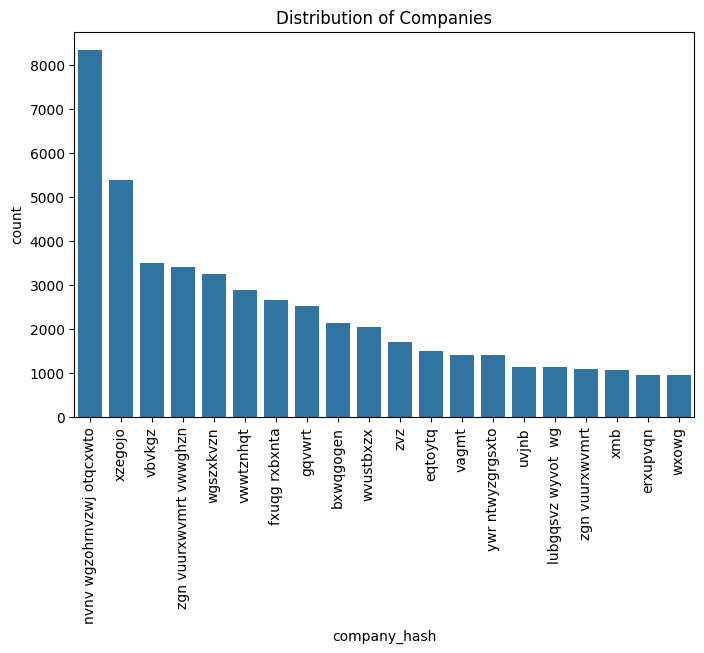

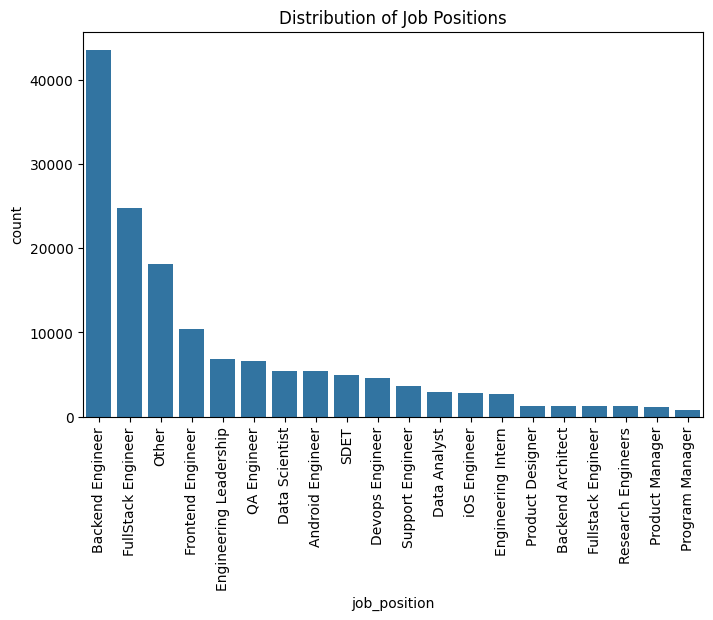

In [ ]:
# Get the top N most frequent occuring values
N = 20

# Filter the DataFrame to only include the top N companies
top_companies = df["company_hash"].value_counts().nlargest(N).index
df_top_companies = df[df["company_hash"].isin(top_companies)]

plt.figure(figsize=(8,5))
sns.countplot(data=df_top_companies, x=df_top_companies["company_hash"], order=top_companies)
plt.title("Distribution of Companies")
plt.xticks(rotation=90)
plt.show()

top_jobs = df["job_position"].value_counts().nlargest(N).index
df_top_jobs = df[df["job_position"].isin(top_jobs)]

plt.figure(figsize=(8,5))
sns.countplot(data=df_top_jobs, x=df_top_jobs["job_position"], order=top_jobs)
plt.title("Distribution of Job Positions")
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df.shape)
# Remove duplicates
df.drop_duplicates(inplace=True)

(205843, 7)


In [ ]:
# Handle missing data
print(f"\nMissing values in data: {df.isna().sum()}")
print(f"\nPercentage of missing values in each column: {round(df.isna().sum()*100/df.shape[0],2)}")
# df.fillna(mean / mode / knn_mean / knn_voting) / df.dropna()


Missing values in data: Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

Percentage of missing values in each column: Unnamed: 0           0.00
company_hash         0.02
email_hash           0.00
orgyear              0.04
ctc                  0.00
job_position        25.54
ctc_updated_year     0.00
dtype: float64


In [ ]:
# Handle missing data in Numerical columns - orgyear
df["orgyear"] = df["orgyear"].fillna(df["orgyear"].median())

# Handle missing data in Categorical columns - company_hash, job_position
df["company_hash"] = df["company_hash"].fillna(df["company_hash"].mode()[0])
df["job_position"] = df["job_position"].fillna(df["job_position"].mode()[0])

print(f"\nMissing values in data (after handling): {df.isna().sum()}")


Missing values in data (after handling): Unnamed: 0          0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64


In [ ]:
# Encode categorical columns
freq_encoding1 = df["company_hash"].value_counts().to_dict()
df["company_encoded"] = df["company_hash"].map(freq_encoding1)

freq_encoding2 = df["job_position"].value_counts().to_dict()
df["jobpos_encoded"] = df["job_position"].map(freq_encoding2)

In [ ]:
# Feature engineering - creating new feature, employee experience = curr yr - starting yr
from datetime import datetime
curr_yr = datetime.now().year
df["experience"] = curr_yr - df["orgyear"]

In [ ]:
print(f"{df.head()}")
df_backup = df
df = df.drop(["Unnamed: 0","company_hash", "email_hash", "job_position"], axis=1)
print(f"After dropping columns:\n{df.head()}")

   Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   
3           3                  ngpgutaxv   
4           4                 qxen sqghu   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000   

         job_position  ctc_updated_year  company_encoded  jobpos_encoded  \
0               Other            2020.0                9           18071   
1  FullStack Engineer            2019.0              429           24717   
2    Backend Engineer            2020.0                1      

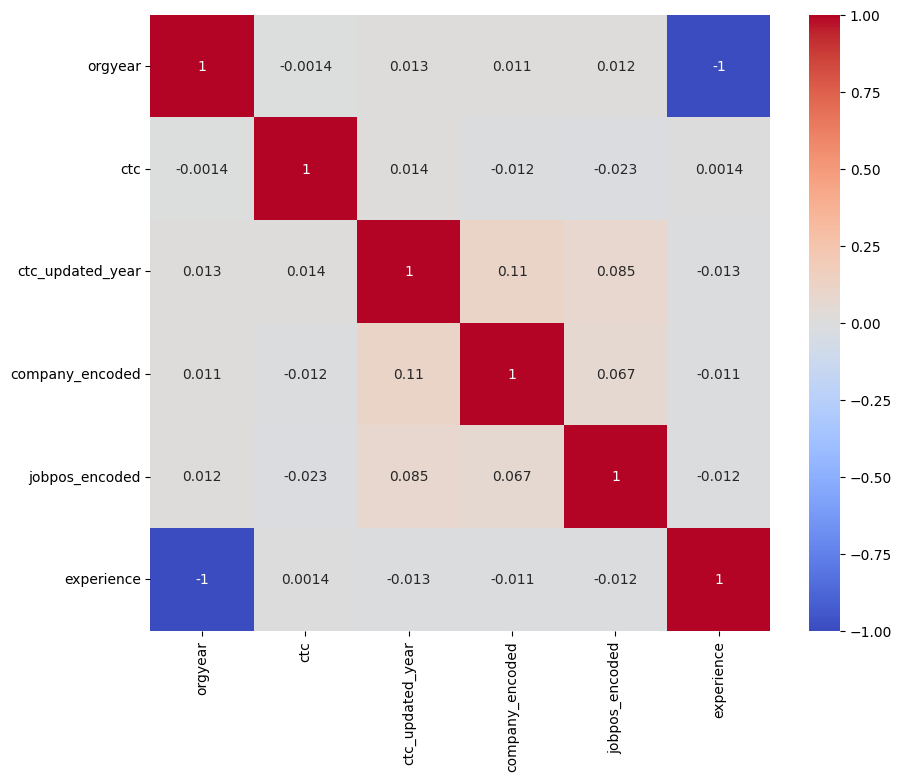

In [ ]:
# Check for correlation between features
corr_matrix = df.corr()

# plot heatmap of correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(f"{df_scaled}")

         orgyear       ctc  ctc_updated_year  company_encoded  jobpos_encoded  \
0       0.099975  0.001100          0.833333         0.000955        0.188000   
1       0.100074  0.000450          0.666667         0.051074        0.257145   
2       0.099926  0.002000          0.833333         0.000000        1.000000   
3       0.100025  0.000700          0.666667         0.008234        1.000000   
4       0.100025  0.001400          0.666667         0.000597        0.257145   
...          ...       ...               ...              ...             ...   
205838  0.099578  0.000220          0.666667         0.001909        1.000000   
205839  0.100025  0.000500          0.833333         0.012768        1.000000   
205840  0.100223  0.000700          1.000000         0.020048        1.000000   
205841  0.100124  0.005099          0.666667         0.127924        1.000000   
205842  0.099876  0.001240          0.166667         0.067422        1.000000   

        experience  
0     

In [ ]:
# Manual clustering

# Getting the 5 point summary of CTC (mean, median, max, min, count etc)
# on the basis of Company, Job Position, Years of Experience

# Group by company, job position & experience and get stats for ctc
#ctc_stats = df_scaled.groupby(["company_encoded","jobpos_encoded","experience"]).agg({"ctc": ["count","min","max","mean","median"]})
ctc_stats = df_scaled.groupby(["company_encoded","jobpos_encoded","experience"]).agg({"ctc": ["count","mean","median"]})
print(ctc_stats)

                                            ctc                    
                                          count      mean    median
company_encoded jobpos_encoded experience                          
0.0             0.0            0.899678       1  0.000570  0.000570
                               0.899777       2  0.000725  0.000725
                               0.899876       9  0.011649  0.000500
                               0.899926      13  0.002630  0.000760
                               0.899975      12  0.001689  0.000600
...                                         ...       ...       ...
1.0             1.0            0.901017       1  0.000300  0.000300
                               0.901066       1  0.000600  0.000600
                               0.901165       1  0.000850  0.000850
                               0.901265       3  0.003266  0.003999
                               0.901314       2  0.001000  0.001000

[34726 rows x 3 columns]


In [ ]:
# Merging the same with original dataset carefully and creating some flags
# showing learners with CTC greater than the Average of their Company’s department
# having same Years of Experience - Call that flag designation with values [1,2,3]

# Flatten the multi-level column index
ctc_stats.columns = ["_".join(col).strip() for col in ctc_stats.columns.values]

# Reset the index if needed
ctc_stats = ctc_stats.reset_index()

# Rename the columns
#ctc_stats.columns = ["company_encoded", "jobpos_encoded", "experience", "ctc_count", "ctc_min", "ctc_max", "ctc_mean", "ctc_median"]
ctc_stats.columns = ["company_encoded", "jobpos_encoded", "experience", "ctc_count", "ctc_mean", "ctc_median"]

# Merge ctc_stats with original dataframe
df_merged = pd.merge(df_scaled, ctc_stats, on=["company_encoded","jobpos_encoded","experience"], how="left")

# Create a flag based on comparison of ctc to ctc_mean
df_merged["designation"] = df_merged.apply(lambda row: 3 if row["ctc"] > row["ctc_mean"] else (2 if row["ctc"] == row["ctc_mean"] else 1), axis=1)
print(df_merged.head())

    orgyear      ctc  ctc_updated_year  company_encoded  jobpos_encoded  \
0  0.099975  0.00110          0.833333         0.000955        0.188000   
1  0.100074  0.00045          0.666667         0.051074        0.257145   
2  0.099926  0.00200          0.833333         0.000000        1.000000   
3  0.100025  0.00070          0.666667         0.008234        1.000000   
4  0.100025  0.00140          0.666667         0.000597        0.257145   

   experience  ctc_count  ctc_mean  ctc_median  designation  
0    0.900025         17  0.000935     0.00069            3  
1    0.899926          7  0.000774     0.00075            1  
2    0.900074        698  0.002987     0.00080            1  
3    0.899975         48  0.000948     0.00080            1  
4    0.899975         59  0.002432     0.00080            1  


In [ ]:
df_merged["designation"].value_counts()

,count
designation,
1,128028
3,60130
2,17685


In [ ]:
df_scaled.head()

,orgyear,ctc,ctc_updated_year,company_encoded,jobpos_encoded,experience
0,0.099975,0.00110,0.833333,0.000955,0.188000,0.900025
1,0.100074,0.00045,0.666667,0.051074,0.257145,0.899926
2,0.099926,0.00200,0.833333,0.000000,1.000000,0.900074
3,0.100025,0.00070,0.666667,0.008234,1.000000,0.899975
4,0.100025,0.00140,0.666667,0.000597,0.257145,0.899975


In [ ]:
# Doing above analysis at Company & Job Position level. Name that flag Class with values [1,2,3]

# Group by company & job position to get stats for ctc
#ctc_stats2 = df_scaled.groupby(["company_encoded", "jobpos_encoded"]).agg({"ctc": ["count","min","max","mean","median"]})
ctc_stats2 = df_scaled.groupby(["company_encoded", "jobpos_encoded"]).agg({"ctc": ["count","mean","median"]})
print(ctc_stats2.info())

# Flatten the column names
#ctc_stats2.columns =["ctc_count2", "ctc_min2", "ctc_max2", "ctc_mean2", "ctc_median2"]
ctc_stats2.columns =["ctc_count2", "ctc_mean2", "ctc_median2"]
ctc_stats2 = ctc_stats2.reset_index()
print(ctc_stats2.head())

# Merge ctc_stats2 with original dataframe
df_merged2 = pd.merge(df_scaled, ctc_stats2, on=["company_encoded", "jobpos_encoded"], how="left")
#print(df_merged2.head())

# Create a flag based on comparison of ctc to ctc_mean2
df_merged2["class"] = df_merged2.apply(lambda row: 3 if row["ctc"] > row["ctc_mean2"] else (2 if row["ctc"] == row["ctc_mean2"] else 1), axis=1)
print(df_merged2.head())

print(df_merged2["class"].value_counts())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5852 entries, (0.0, 0.0) to (1.0, 0.9999999999999999)
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (ctc, count)   5852 non-null   int64  
 1   (ctc, mean)    5852 non-null   float64
 2   (ctc, median)  5852 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 156.9 KB
None
   company_encoded  jobpos_encoded  ctc_count2  ctc_mean2  ctc_median2
0              0.0        0.000000          83   0.004917     0.000700
1              0.0        0.000010           9   0.001741     0.000600
2              0.0        0.000021           5   0.000662     0.000550
3              0.0        0.000031           2   0.000431     0.000431
4              0.0        0.000042           1   0.002820     0.002820
    orgyear      ctc  ctc_updated_year  company_encoded  jobpos_encoded  \
0  0.099975  0.00110          0.833333         0.000955        0.188000   
1  0.100074

In [ ]:
# Group by company to get stats for ctc
ctc_stats3 = df_scaled.groupby(["company_encoded"]).agg({"ctc": ["count", "min", "max", "mean", "median"]})

# Flatten the column names
ctc_stats3.columns = ["ctc_count3", "ctc_min3", "ctc_max3", "ctc_mean3", "ctc_median3"]

# Merge ctc_stats3 with the original dataframe
df_merged3 = pd.merge(df_scaled, ctc_stats3, on=["company_encoded"], how="left")

# Create a flag based on comparison of ctc to ctc_mean3
df_merged3["tier"] = df_merged3.apply(lambda row: 3 if row["ctc"] > row["ctc_mean3"] else (2 if row["ctc"]==row["ctc_mean3"] else 1), axis=1)
print(df_merged3.head(3))

print(df_merged3["tier"].value_counts())

    orgyear      ctc  ctc_updated_year  company_encoded  jobpos_encoded  \
0  0.099975  0.00110          0.833333         0.000955        0.188000   
1  0.100074  0.00045          0.666667         0.051074        0.257145   
2  0.099926  0.00200          0.833333         0.000000        1.000000   

   experience  cluster  ctc_count3      ctc_min3  ctc_max3  ctc_mean3  \
0    0.900025        4        1764  9.978503e-07   0.19997   0.001795   
1    0.899926        4         429  9.996501e-06   0.19997   0.002193   
2    0.900074        2       23494  2.199670e-08   1.00000   0.003382   

   ctc_median3  tier  
0      0.00100     1  
1      0.00090     1  
2      0.00077     1  
tier
1    170555
3     35287
2         1
Name: count, dtype: int64


In [ ]:
# Top 10 employees (earning more than most of the employees in the company) - Tier 3
top10_tier3 = df_merged3[df_merged3["tier"]==3].sort_values(by="ctc", ascending=False).head(10)
print(f"Top 10 employees (earning more than most of the employees in the company) - Tier 3: \n{top10_tier3}")

# Bottom 10 employees (earning less than most of the employees in the company)- Tier 1
bottom10_tier1 = df_merged3[df_merged3["tier"]==1].sort_values(by="ctc", ascending=False).tail(10)
print(f"\nBottom 10 employees (earning less than most of the employees in the company) - Tier 3: \n{bottom10_tier1}")

# Top 10 employees of data science in each company earning more than their peers - Class 3
top10_class3 = df_merged2[df_merged2["class"]==3].sort_values(by="ctc", ascending=False).head(10)
print(f"\nTop 10 employees of data science in each company earning more than their peers - Class 3: \n{top10_class3}")

# Bottom 10 employees of data science in each company earning less than their peers - Class 1
bottom10_class1 = df_merged2[df_merged2["class"]==1].sort_values(by="ctc", ascending=False).tail(10)
print(f"\nBottom 10 employees of data science in each company earning less than their peers - Class 1: \n{bottom10_class1}")

# Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X
filtered_df = df_merged3[(df_merged3["tier"]==3) & (df_merged3["experience"].isin([5,6,7]))]

# Top 10 companies (based on their CTC)
top10_companies = df_merged3.sort_values(by="ctc_mean3", ascending=False).head(10)["company_encoded"]
print(f"\nTop 10 companies (based on their CTC): \n{top10_companies}")

# Top 2 positions in every company (based on their CTC)
sorted_df2 = df_merged2.sort_values(by=["company_encoded", "ctc"], ascending=[True, False])
sorted_df2.groupby("company_encoded").head(2)

Top 10 employees (earning more than most of the employees in the company) - Tier 3: 
         orgyear       ctc  ctc_updated_year  company_encoded  jobpos_encoded  \
72824   0.099926  1.000000          0.833333         0.000000        1.000000   
117636  0.100074  0.255517          0.166667         0.000597        1.000000   
3301    0.100223  0.249963          0.833333         0.000000        1.000000   
21614   0.099876  0.199970          0.833333         0.000000        0.037475   
78974   0.099926  0.199970          0.833333         0.002864        0.030224   
79002   0.100074  0.199970          0.833333         0.316468        0.108368   
21543   0.099926  0.199970          0.833333         0.012649        0.030224   
21544   0.099926  0.199970          0.833333         0.386516        0.188000   
107214  0.099926  0.199970          0.833333         0.046301        0.030224   
26078   0.100025  0.199970          0.833333         0.039021        0.030224   

        experience  ctc

,orgyear,ctc,ctc_updated_year,company_encoded,jobpos_encoded,experience,ctc_count2,ctc_mean2,ctc_median2,class
72824,0.099926,1.000000,0.833333,0.000000,1.000000,0.900074,6443,0.002897,0.00075,3
3301,0.100223,0.249963,0.833333,0.000000,1.000000,0.899777,6443,0.002897,0.00075,3
5348,0.099926,0.199970,0.833333,0.000119,0.030224,0.900074,163,0.005217,0.00060,3
5851,0.099876,0.199970,0.833333,0.000119,1.000000,0.900124,6008,0.001564,0.00070,3
7485,0.100074,0.199970,0.833333,0.000239,0.188000,0.899926,508,0.003573,0.00060,3
...,...,...,...,...,...,...,...,...,...,...
12543,0.099876,0.199970,0.833333,0.415274,0.188000,0.900124,269,0.004448,0.00055,3
602,0.100025,0.199970,0.833333,0.642005,1.000000,0.899975,2707,0.001457,0.00050,3
1303,0.099727,0.199970,0.833333,0.642005,0.188000,0.900273,866,0.001606,0.00043,3
1241,0.099926,0.199970,0.833333,1.000000,1.000000,0.900074,4415,0.001369,0.00046,3


In [ ]:
# Clustering tendency - using Hopkins statistic
from sklearn.neighbors import NearestNeighbors
import numpy as np
import random

def Hopkins(X):
  n = X.shape[0]
  d = X.shape[1]
  m = int(0.1*n)  # no.of random points

  nbrs = NearestNeighbors(n_neighbors=1).fit(X)

  # Generate m random points within the original data's bounding box
  rand_X = np.random.uniform(np.min(X, axis=0),np.max(X, axis=0),(m,d))

  # Compute distance between m random points & their neighbors
  u_dist = np.mean([nbrs.kneighbors([rand_pt], 1, return_distance=True)[0][0][0] for rand_pt in rand_X])
  '''
  u_dist = []
  for rand_pt in rand_X:
    u_dist.append(nbrs.kneighbors([rand_pt],1,return_distance=True)[0][0][0])
  '''

  # Compute distance between m original data points & their neighbors
  sample_indices = random.sample(range(n), m)
  w_dist = np.mean([nbrs.kneighbors([X[idx]], 2, return_distance=True)[0][0][1] for idx in sample_indices])
  '''
  w_dist = []
  sample_indices = random.sample(range(n),m)
  for sample_idx in sample_indices:
    sample_pt = X[sample_idx].reshape(1,-1)
    w_dist.append(nbrs.kneighbors([sample_pt],2,return_distance=True)[0][0][1])
  '''

  # Compare distances to arrive at clustering tendency
  hopkins_statistic = u_dist / (u_dist + w_dist)
  #hopkins_statistic = sum(u_dist) / (sum(u_dist)+sum(w_dist))
  return hopkins_statistic

'''
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_scaled[:] = imputer.fit_transform(df_scaled)
'''

X = df_scaled.values
print(f"{df_scaled.isnull().sum()}")
H = Hopkins(X)
print(f"Hopkins statistic (H) = {H:.2f}")
# if H is close to 0 or 1, data has strong clustering tendency
# if H is close to 0.5, data is uniform (random) & has low clustering tendency

orgyear             0
ctc                 0
ctc_updated_year    0
company_encoded     0
jobpos_encoded      0
experience          0
dtype: int64
Hopkins statistic (H) = 1.00


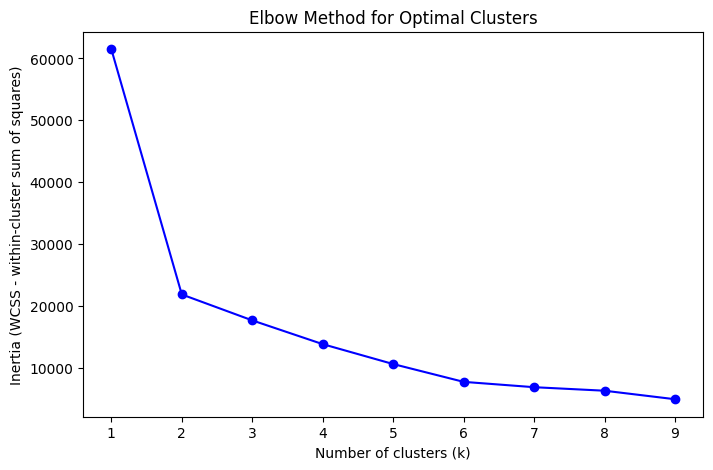

In [ ]:
# Elbow method - to find optimal no.of clusters
from sklearn.cluster import KMeans

# Step1: Run KMeans for different no.of clusters & compute inertia / WCSS for each
inertia = []
K = range(1,10)
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

# Step2: Plot the inertia / WCSS (Elbow method)
plt.figure(figsize=(8,5))
plt.plot(K, inertia, "bo-")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS - within-cluster sum of squares)")
plt.show()

cluster
1    105467
0    100376
Name: count, dtype: int64

Cluster medians: 
cluster
0    0.00105
1    0.00084
Name: ctc, dtype: float64


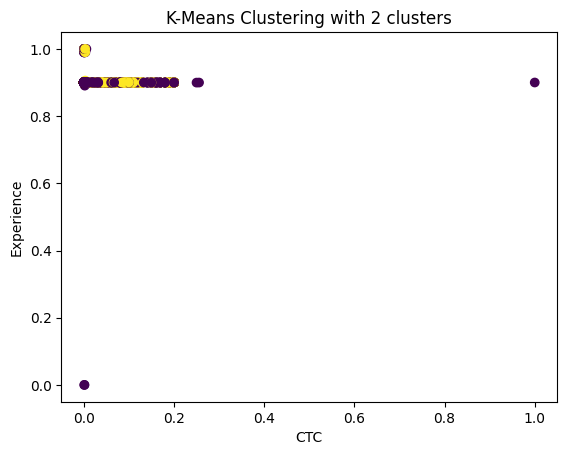

In [ ]:
# KMeans Clustering - using optimal clusters found in elbow method
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
kmeans.fit(df_scaled)

# Assign cluster labels to the original data
df_scaled["cluster"] = kmeans.labels_
print(df_scaled['cluster'].value_counts())

cluster_medians_scaled = df_scaled.groupby("cluster")["ctc"].median()
print(f"\nCluster medians: \n{cluster_medians_scaled}")

# Visualize the clusters (for 2D data)
plt.scatter(df_scaled["ctc"],df_scaled["experience"],c=df_scaled["cluster"],cmap="viridis",marker="o")
plt.title(f"K-Means Clustering with {optimal_k} clusters")
plt.xlabel("CTC")
plt.ylabel("Experience")
plt.show()

In [ ]:
# To seee cluster-wise median ctc, in original scale

# Assuming 'df' has the 7 columns, with the extra one being 'cluster'
columns_used_for_scaling = ['orgyear', 'ctc', 'ctc_updated_year', 'company_encoded', 'jobpos_encoded', 'experience']  # Original 6 columns

# Ensure only the scaled columns are used
df_scaled_original = df[columns_used_for_scaling]

# Create a dummy array with the same number of columns as the scaler was fitted on
dummy_array = np.zeros((len(cluster_medians_scaled), df_scaled_original.shape[1]))

# Place the scaled median CTC values in the appropriate position (index of 'ctc')
ctc_index = df_scaled_original.columns.get_loc('ctc')  # Get the index of the 'ctc' column
dummy_array[:, ctc_index] = cluster_medians_scaled.values

# Perform the inverse transformation
original_ctc_medians = scaler.inverse_transform(dummy_array)[:, ctc_index]

# Convert to pandas Series for readability
original_ctc_medians = pd.Series(original_ctc_medians, index=cluster_medians_scaled.index)
print(f"Median CTC in original scale: {original_ctc_medians}")

Median CTC in original scale: cluster
0    1050000.0
1     840000.0
dtype: float64


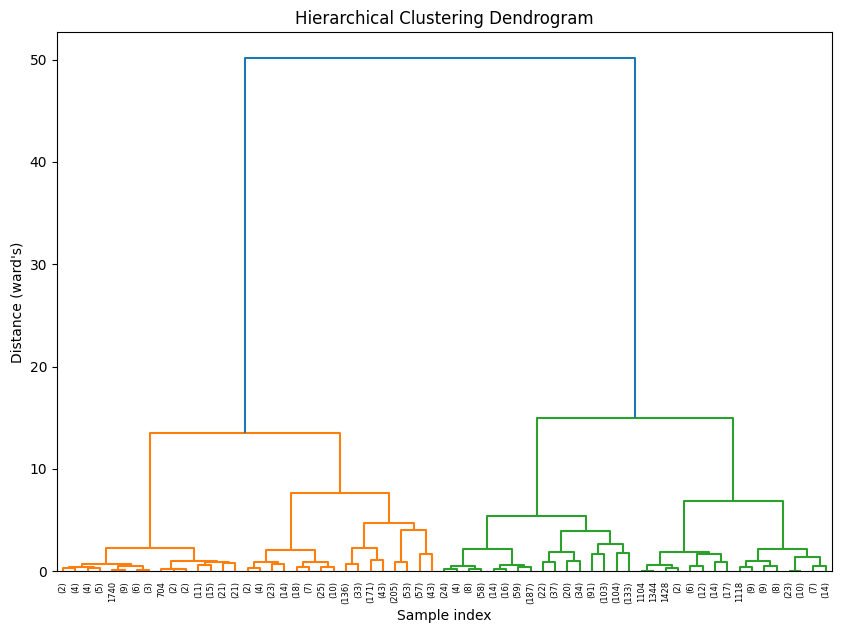

In [ ]:
# Hierarchical Clustering - on sample of dataset, as it may take long time

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Take a smaller sample of the dataset, as Hierarchical clustering takes time
df_sample = df_scaled.sample(n=2000, random_state=42)

# Fit the model
hier_clustering = AgglomerativeClustering(n_clusters=optimal_k, metric="euclidean", linkage="ward")
hier_clusters = hier_clustering.fit_predict(df_sample)

# Assign cluster labels to sample dataset
df_sample["hier_cluster"] = hier_clusters

# Generate the linkage matrix (for dendrogram visualization)
Z = linkage(df_sample, method="ward")

plt.figure(figsize=(10,7))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance (ward's)")
plt.show()

**Summary of my analysis:**

Evaluation Criteria (100 Points):

1. Define Problem Statement & perform Exploratory Data Analysis (10 points)

2. Data Pre-processing: (30 Points) Mean/ KNN Imputation Regex for cleaning company names Standardization & Encoding

3. Manual Clustering: (30 Points) Creating Designation Flag & Insights Creating Class Flag & Insights Creating Tier Flag & Insights

4. Unsupervised learning: (20 Points) Checking clustering tendency, Elbow method & K- means clustering Hierarchical Clustering

5. Actionable Insights & Recommendations (10 Points)

**My observations in each section:**

**1. Problem & EDA:**

The problem was to cluster Scaler's learner database based on their current company, job position, experience & ctc.

On intial EDA,

*   Dataset size: ~2 lac rows, 7 cols - The dataset has info about 2 lac learners
*   The 2 lac learners are working in 37K different companies & in 1K different job positions
*   2 companies had large no.of learners working in (company names are encoded)
*   3 job positions had large no.of learners working in (Backend Engineer	~43554
FullStack Engineer	~24717, Frontend Engineer ~10K)
*   CTC ranged between 5.3 Lpa to 17 Lpa (25% and 75% percentiles), with median CTC of 9 Lpa
*   The data is of learners who started jobs between 2013 to 2018
*   Plotted univariate & bivariate graphs using histplot & barplot, didn't find any high correlation between features

**2. Data pre-processing:**

*   Missing values: There are less than 1% missing values in 6 cols & 25% missing in jobposition categorical column. Used mode & median imputations to fill missing values.
*   Feature engineering: Added a new column, no.of years of experience - which is a key feature that can impact the CTC values.
*   Encoding categorical columns: Used frequency encoding to convert categorical columns - company, jobposition - as the no.of unique values was very high (about 37K uniq vals) & there is a skew in the values (some companies & jobpos had many learners working in relative ot other vals) that made sense to retain.
*   Feature scaling: Used MinMaxScaling to convert all values in the range (0,1)

**3. Manual Clustering:**

*   Created Designation flag based on company, jobpos & experience - found below distribution - mean_ctc of learners was calculated by grouping learners working in same company, same jobpos, same experience:

*   Designation D1 (ctc < mean_ctc) - 128,028 learners (61% of total learners)
*   D2 (ctc = mean_ctc)- 17,685 learners (9% of total)
*   D3 (ctc > mean_ctc) -	60,130 learners (30% of total)

*   Created Class flag based on company, jobpos - found below distribution - mean_ctc of learners was calculated by grouping learners working in same company, same jobpos:

*   Class C1 (ctc < mean_ctc) - 156,448 learners (76% of total)
*   C2 (ctc = mean_ctc) - 1,419 learners (1% of total)
*   C3 (ctc > mean_ctc) - 47,976 learners (23% of total)

*   Created Tier flag based on company - found below distribution - mean_ctc is calculated by grouping learning working in same company:

*   Tier T1 (ctc < mean_ctc) - 170,555 learners (83% of total learners)
*   T2 (ctc = mean_ctc) - 1 learner
*   T3 (ctc > mean_ctc) - 35,287 learners (17% of total)

Between 17% to 30% of learners can be classified as Top earners

**4. Unsupervised learning:**

*   Checked for clustering tendency using Hopkins statistic & got a value of 1.0 signifying high clustering tendency
*   Used elbow method to plot - Inertia vs no.of clusters - found a sharp decline in inertia after 2 clusters. Applied kMeans++ clustering with no.of clusters = 2 & got the below distribution:

*   Cluster 1, C1 - 105,467 learners with median ctc of 10.5 Lpa
*   Cluster 2, C2 - 100,376 learners with median ctc of 8.4 Lpa

*   Used hierarchical clustering on a sample of 2000 data points (1% of total) & found when no.of clusters = 2 (as seen in elbow plot), the data was better segregated

**5. Actionable Insights & Recommendations:**

From Scaler's business perspective:

1. See if their learners are doing better than industry average & use it as an USP in their new ads to acquire new learners. They can do this by comparing the mean_ctc stats from above analysis against mean_ctc of employees (non-scaler) working in those companies, job positions & similar experience.

2. Trace back what's common in the work ethics, key metrics (PSP, Mock interviews, Module test performance) of the top performers & include them into the platform's system.

3. Spot potential top performers (earners) early & map them to the openings in top companies for higher selection rates & satisfaction rate of companies (which is their 2nd important customer segment).